In [1]:
from pychorus import create_chroma
from pychorus.similarity_matrix import TimeTimeSimilarityMatrix, TimeLagSimilarityMatrix

chroma, _, sr, _ = create_chroma("data/todi/Madurai Mani Iyer - Kamalambike.mp3")
time_time_similarity = TimeTimeSimilarityMatrix(chroma, sr)
time_lag_similarity = TimeLagSimilarityMatrix(chroma, sr)

# Visualize the results
time_time_similarity.display()
time_lag_similarity.display()

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

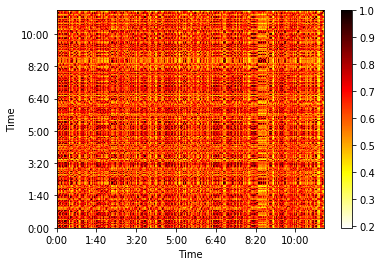

In [2]:
# Visualize the results
time_time_similarity.display()

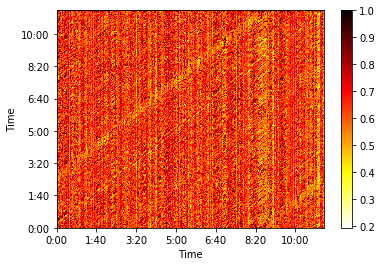

In [3]:
time_lag_similarity.display()

In [4]:
import librosa
audio_path = "data/todi/Madurai Mani Iyer - Kamalambike.mp3"
x , sr = librosa.load(audio_path)

In [5]:
print(x.shape, sr)

(14836710,) 22050


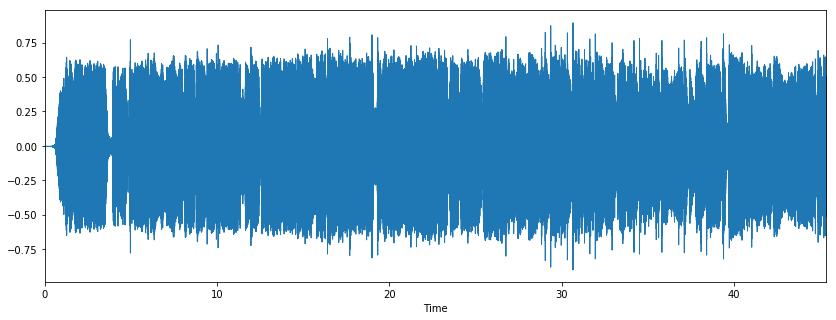

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[1:1000000,], sr=sr)

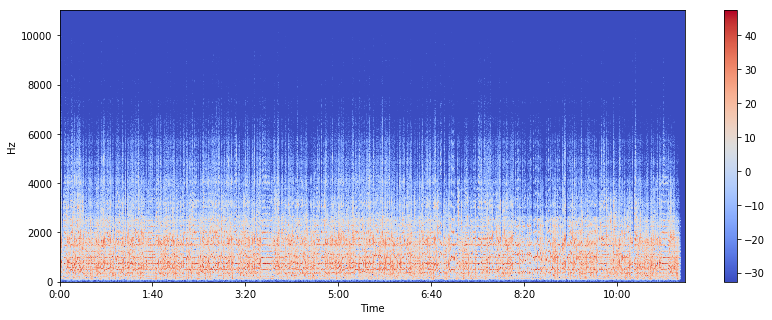

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

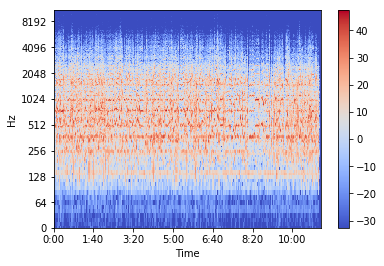

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [9]:
librosa.output.write_wav('example.wav', x, sr)

In [17]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [22]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'todi saurastram kamas'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'data/{g}'):
        songname = f'data/{g}/{filename}'
        print(songname)
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

data/todi/Ariyakudi Ramanuja Iyengar - Tillana.mp3
data/todi/O. S. Thyagarajan - R.T.P-thodi.mp3
data/todi/T. M. Krishna - Vazhi Maraittirukkude.mp3
data/todi/Abhishek Raghuram - Kaddanu Variki.mp3
data/todi/Unnikrishnan - Dasukovalena.mp3
data/todi/Sanjay Subrahmanyan - RTP Nelata Marulu Kontini.mp3
data/todi/Gayathri Venkataraghavan - Koluvamaragada.mp3
data/todi/Nithyasree Mahadevan - Sri Venkatesam.mp3
data/todi/Nisha P Rajagopal - Ninne Nammi Naanu.mp3
data/todi/S. Sowmya - Jesinadella.mp3
data/todi/Sikkil Gurucharan - Eranapai.mp3
data/todi/Ariyakudi Ramanuja Iyengar - Koluvamaregada.mp3
data/todi/T. Brinda - Ne Morabetti.mp3
data/todi/Nithyasree Mahadevan - Sri Krishnam Bhaja.mp3
data/todi/M.S. Subbulakshmi - Raave Himagirikumari (Swarajati).mp3
data/todi/G. N. Balasubramaniam - Thanam & Pallavi.mp3
data/todi/K. V. Narayanaswami - Ninne Namminanu.mp3
data/todi/Aruna Sairam - Mummurthi Vandanam RTP.mp3
data/todi/T. M. Krishna - Kartikeya.mp3
data/todi/Sanjay Subrahmanyan - RTP_Ra

<Figure size 720x720 with 0 Axes>

In [23]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(, y_predicted))

In [54]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'todi saurastram kamas'.split()
for g in genres:
    for filename in os.listdir(f'data/{g}'):
        songname = f'data/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        filename = filename.replace(" ", "")
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split(" "))

In [55]:
import pandas as pd
df = pd.read_csv("data.csv")

In [56]:
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,AriyakudiRamanujaIyengar-Tillana.mp3,0.268711,0.089445,1162.169381,938.095589,1934.454969,0.082610,-281.003295,210.435571,-41.482019,...,1.633783,6.835465,-1.511880,-2.945845,3.080937,-7.579445,-2.974468,-1.877829,-1.419259,todi
1,O.S.Thyagarajan-R.T.P-thodi.mp3,0.270229,0.220521,1694.786303,1611.394058,3232.580453,0.086671,-105.162316,117.201558,-65.932824,...,-2.949646,-5.642574,-1.553388,-6.911159,-1.964482,-14.956536,7.682885,-6.139875,-10.773401,todi
2,T.M.Krishna-VazhiMaraittirukkude.mp3,0.222239,0.029094,1901.175702,2012.847764,3806.543649,0.081883,-306.093761,96.448294,-32.288206,...,-0.031537,-5.508321,-13.353211,2.092080,2.197201,-4.811618,6.811631,-5.988690,0.085662,todi
3,AbhishekRaghuram-KaddanuVariki.mp3,0.293967,0.032954,1514.636464,1827.872274,2736.216788,0.084224,-298.198658,122.415941,-20.314159,...,-4.480035,2.108347,4.114902,-5.145812,3.116082,3.825322,6.324936,0.954125,11.754861,todi
4,Unnikrishnan-Dasukovalena.mp3,0.349139,0.092797,2043.832696,1878.929382,3586.911644,0.121108,-212.709091,87.438571,-62.062683,...,-1.732816,-6.868490,-15.749096,-11.423182,-6.367966,-13.765091,-2.725262,-4.607997,-2.368171,todi


['chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20']

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[header[1:27]])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

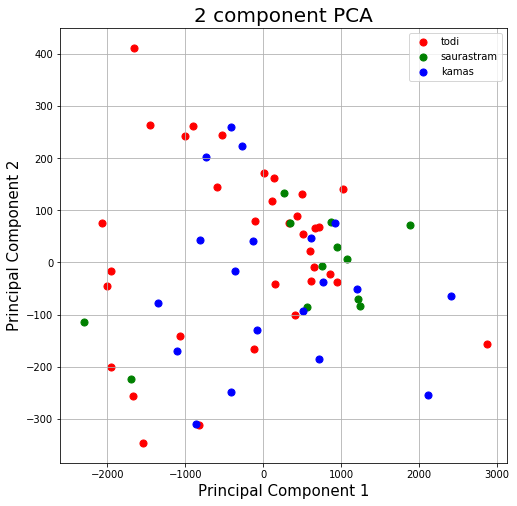

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['todi', 'saurastram', 'kamas']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [79]:
import numpy as np
from sklearn.cluster import KMeans

X=np.matrix(df[header[1:27]])
kmeans = KMeans(n_clusters=3).fit(X)

In [92]:
df["kmeans"] = kmeans.labels_

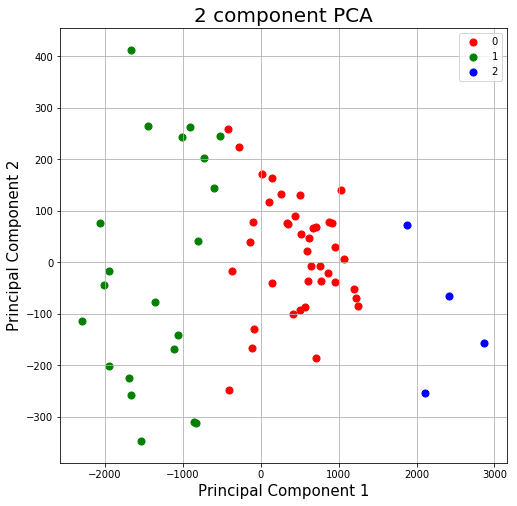

In [95]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['kmeans'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()